# Notebook for computing Hypervolume

This is an example notebook to compute the Hypervolume for problem formulation: Nordhaus + Sufficientarian.

## Define the Problem

In [1]:
from platypus import Solution, Problem

# n_objs = 7
n_objs = 2

n_decision_vars = 3

problem = Problem(n_decision_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MAXIMIZE  # Total aggregated utility
problem.directions[1] = Problem.MINIMIZE  # Distance to threshold 2035
# problem.directions[2] = Problem.MINIMIZE  # Distance to threshold 2055
# problem.directions[3] = Problem.MINIMIZE  # Distance to threshold 2075
# problem.directions[4] = Problem.MINIMIZE  # Population under threshold 2035
# problem.directions[5] = Problem.MINIMIZE  # Population under threshold 2055
# problem.directions[6] = Problem.MINIMIZE  # Population under threshold 2075


## Create a Reference Set

In [2]:
import pandas as pd

data = pd.read_csv('./results/NORDHAUS/SUFFICIENTARIAN/archive_199.csv', index_col=0).iloc[:, :5]

ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row.values[n_decision_vars::]
    ref_set.append(solution)

solution = Solution(problem)
solution.objectives[:] = 0
ref_set.append(solution)

In [3]:
data

,sr,miu,irstp,Total Aggregated Utility,Distance to threshold 2035
0,0.221163,2071.980067,0.001,17950.011497,0.112855
1,0.177332,2067.927456,0.001,17900.002784,0.107758
2,0.133113,2065.146345,0.001,17800.076455,0.102639
3,0.100007,2065.009641,0.001,17672.929081,0.098822
4,0.105873,2065.077081,0.001,17700.072498,0.099499
5,0.151902,2065.064505,0.001,17850.027736,0.104805
6,0.118191,2065.003773,0.001,17750.040244,0.100918


In [4]:
data.iloc[:, n_decision_vars::].min()

Total Aggregated Utility      17672.929081
Distance to threshold 2035        0.098822
dtype: float64

In [5]:
data.iloc[:, n_decision_vars::].max()

Total Aggregated Utility      17950.011497
Distance to threshold 2035        0.112855
dtype: float64

## Load all archives and merge them

In [6]:
import pandas as pd

archives = []
for i in range(2, 200):
    archive = pd.read_csv(f'./results/NORDHAUS/SUFFICIENTARIAN/archive_{i}.csv')
    nfe_column = [i*1000 for _ in range(archive.shape[0])]
    archive.loc[:, 'Unnamed: 0'] = nfe_column
    archive.rename(columns={'Unnamed: 0': 'nfe'}, inplace=True)
    archives.append(archive)

archives = pd.concat(archives)
archives = archives.iloc[:, :6]
archives

,nfe,sr,miu,irstp,Total Aggregated Utility,Distance to threshold 2035
0,2000,0.224019,2285.041456,0.001234,17213.162297,0.113453
1,2000,0.151142,2171.439718,0.001604,16130.187858,0.104972
2,2000,0.109935,2238.029382,0.002411,14039.136180,0.100266
3,2000,0.100983,2265.027269,0.003319,12140.526480,0.099245
4,2000,0.123296,2145.405225,0.002071,14890.561676,0.101738
...,...,...,...,...,...,...
2,199000,0.133113,2065.146345,0.001000,17800.076455,0.102639
3,199000,0.100007,2065.009641,0.001000,17672.929081,0.098822
4,199000,0.105873,2065.077081,0.001000,17700.072498,0.099499
5,199000,0.151902,2065.064505,0.001000,17850.027736,0.104805


## Hypervolume for the reference set

In [7]:
from platypus import Hypervolume

hv = Hypervolume(reference_set=ref_set)
hv


## Prepare archives as a dictionary

In [8]:
archives_dict = {}
for nfe, generation in archives.groupby("nfe"):
    archive = []
    for i, row in generation.iloc[:, 4::].iterrows():
        solution = Solution(problem)
        solution.objectives = row
        archive.append(solution)
    archives_dict[nfe] = archive

## Compute Hypervolume values

In [9]:
nfes = []
hvs = []
for nfe, archive in archives_dict.items():
    nfes.append(nfe)
    hvs.append(hv.calculate(archive))

## Plot

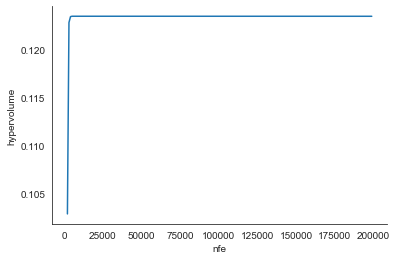

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, hvs)
ax.set_xlabel('nfe')
ax.set_ylabel('hypervolume')

sns.despine()

plt.show()